In [1]:
from DateRanges import e_year_ranges, ne_year_ranges
import FixedIncomeAnalysisClass as FI
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

8


Creating the dataframe

In [2]:
df = pd.read_csv("Data/TreasuryData/cleaned_treasury_data.csv")
df.Date = pd.to_datetime(df.Date)
df.index = df.Date
df = df.drop(columns = ["Unnamed: 0", "Date"])
df

,GT 10 GOVT 11_15_34 Close,GT 5 GOVT 10_31_29 Close,GT 30 GOVT 11_15_54 Close,GB 06 GOVT 05_08_25 Close
Date,,,,
2024-11-12,4.397,4.295,4.554,4.468
2024-11-08,4.305,4.192,4.471,4.445
2024-11-07,4.328,4.172,4.531,4.416
2024-11-06,4.433,4.275,4.612,4.437
2024-11-05,4.273,4.150,4.436,4.418
...,...,...,...,...
1991-03-21,8.139,7.804,8.329,6.144
1991-03-20,8.167,7.851,8.343,6.177
1991-03-19,8.234,7.909,8.403,6.199


In [3]:
for year in e_year_ranges:
    start_date, end_date = e_year_ranges[year]
    new_df = df[ (df.index > start_date) & (df.index < end_date)]

    print(new_df.std())
    
    """
    new_df.plot()
    plt.title("Election Cycle " + year)
    plt.show()"""
    

GT 10 GOVT 11_15_34 Close    0.364043
GT 5 GOVT 10_31_29 Close     0.481297
GT 30 GOVT 11_15_54 Close    0.210069
GB 06 GOVT 05_08_25 Close    0.333648
dtype: float64
GT 10 GOVT 11_15_34 Close    0.208507
GT 5 GOVT 10_31_29 Close     0.218464
GT 30 GOVT 11_15_54 Close    0.168564
GB 06 GOVT 05_08_25 Close    0.101906
dtype: float64
GT 10 GOVT 11_15_34 Close    0.238254
GT 5 GOVT 10_31_29 Close     0.298552
GT 30 GOVT 11_15_54 Close    0.141464
GB 06 GOVT 05_08_25 Close    0.074446
dtype: float64
GT 10 GOVT 11_15_34 Close    0.269868
GT 5 GOVT 10_31_29 Close     0.240745
GT 30 GOVT 11_15_54 Close    0.235672
GB 06 GOVT 05_08_25 Close    0.263739
dtype: float64
GT 10 GOVT 11_15_34 Close    0.175395
GT 5 GOVT 10_31_29 Close     0.329903
GT 30 GOVT 11_15_54 Close    0.210320
GB 06 GOVT 05_08_25 Close    0.431988
dtype: float64
GT 10 GOVT 11_15_34 Close    0.109119
GT 5 GOVT 10_31_29 Close     0.060745
GT 30 GOVT 11_15_54 Close    0.140098
GB 06 GOVT 05_08_25 Close    0.008344
dtype: float6

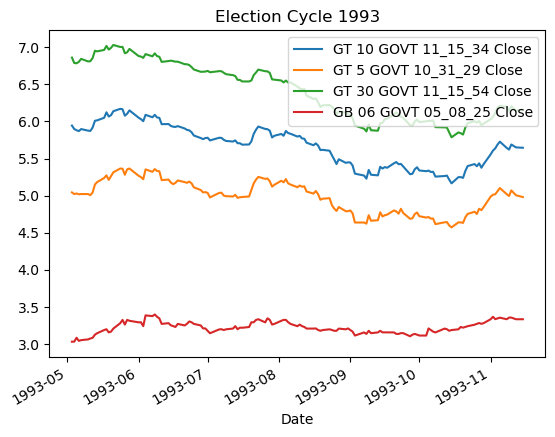

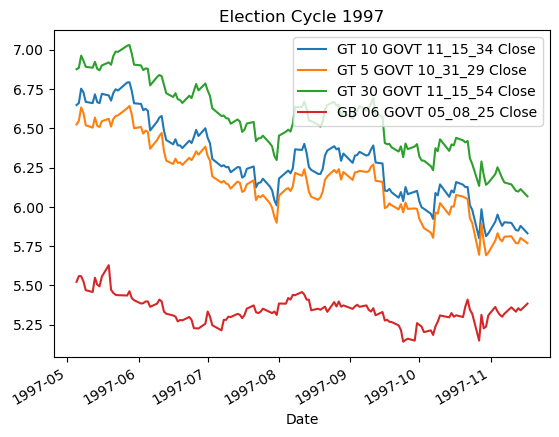

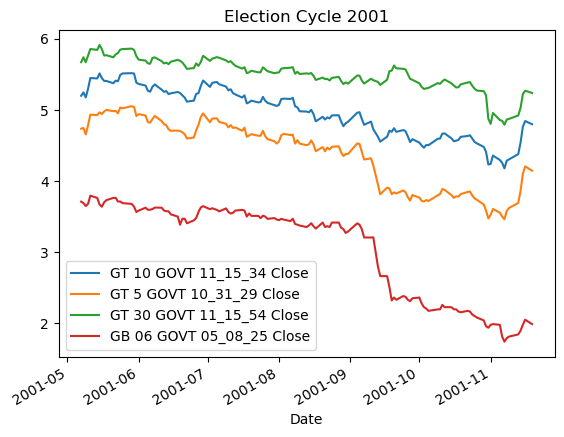

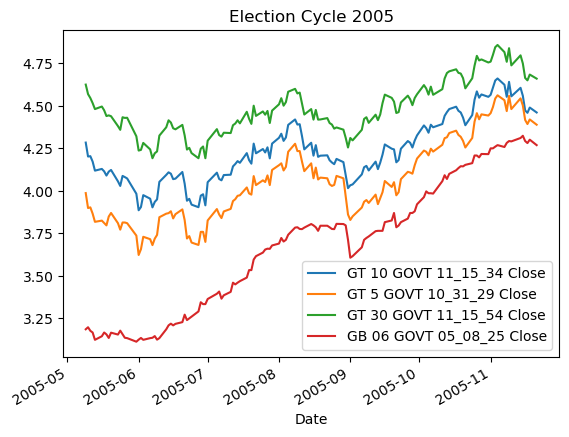

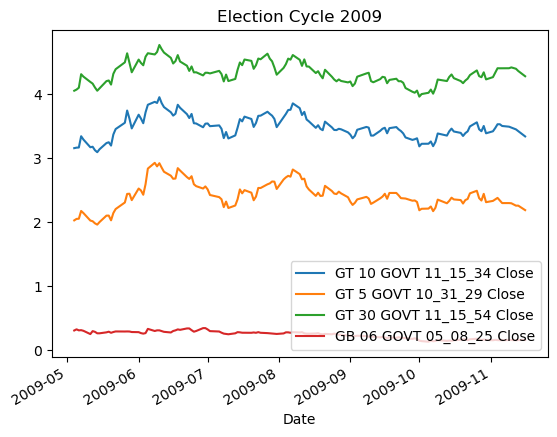

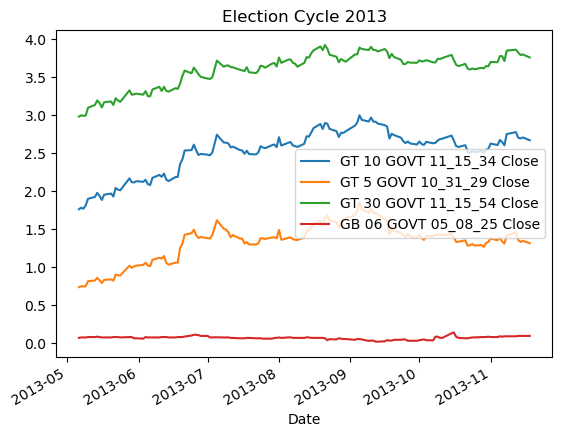

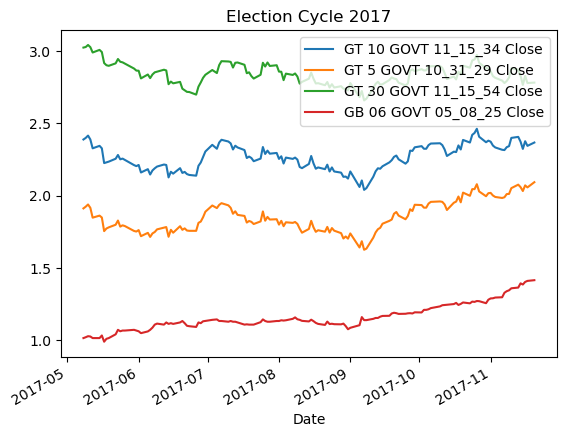

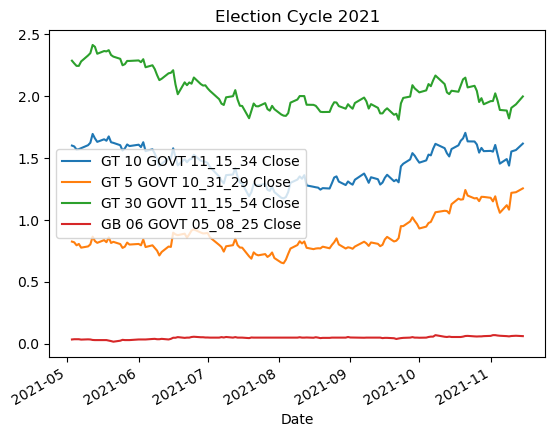

In [4]:
for year in ne_year_ranges:
    start_date, end_date = ne_year_ranges[year]
    new_df = df[ (df.index > start_date) & (df.index < end_date)]
    
    new_df.plot()
    plt.title("Election Cycle " + year)
    plt.show()

In [5]:
df["Objects"] = df["GT 10 GOVT 11_15_34 Close"].apply(lambda x : FI.Treasuries(x, 10) )

In [6]:
df["Objects"].apply(lambda x : x.value_at_risk())

Date
2024-11-12    2.597494
2024-11-08    2.544025
2024-11-07    2.680566
2024-11-06    2.348686
2024-11-05    2.652561
                ...   
1991-03-21    0.706626
1991-03-20    0.667023
1991-03-19    0.662330
1991-03-18    0.672837
1991-03-15    0.691851
Name: Objects, Length: 8414, dtype: float64

In [7]:
ne_year_ranges

{'1993': [datetime.datetime(1993, 5, 2, 0, 0),
  datetime.datetime(1993, 11, 16, 0, 0)],
 '1997': [datetime.datetime(1997, 5, 4, 0, 0),
  datetime.datetime(1997, 11, 18, 0, 0)],
 '2001': [datetime.datetime(2001, 5, 6, 0, 0),
  datetime.datetime(2001, 11, 20, 0, 0)],
 '2005': [datetime.datetime(2005, 5, 8, 0, 0),
  datetime.datetime(2005, 11, 22, 0, 0)],
 '2009': [datetime.datetime(2009, 5, 3, 0, 0),
  datetime.datetime(2009, 11, 17, 0, 0)],
 '2013': [datetime.datetime(2013, 5, 5, 0, 0),
  datetime.datetime(2013, 11, 19, 0, 0)],
 '2017': [datetime.datetime(2017, 5, 7, 0, 0),
  datetime.datetime(2017, 11, 21, 0, 0)],
 '2021': [datetime.datetime(2021, 5, 2, 0, 0),
  datetime.datetime(2021, 11, 16, 0, 0)]}